# For Paper

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from helpers import *
import ast
import requests
from bs4 import BeautifulSoup as bs
import statsmodels.api as sm
from scipy.stats import halfnorm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [16]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

In [17]:
relevant = ["id", "name", "last_scraped", "description", "neighborhood_overview", "host_id", "host_url", "host_name", "host_since", "host_location",
                                "host_about", "host_is_superhost", "host_listings_count","host_identity_verified",
                                "neighbourhood_cleansed",
                                "latitude",
                                "longitude",
                                "property_type",
                                "room_type",
                                "accommodates",
                                "bathrooms_text",
                                "bedrooms",
                                "beds",
                                "amenities",
                                "minimum_nights",
                                "maximum_nights",
                                "has_availability",
                                "availability_30",
                                "availability_60",
                                "availability_90",
                                "availability_365",
                                "number_of_reviews",
                                "number_of_reviews_ltm", 
                                "number_of_reviews_l30d", 
                                "first_review",
                                "last_review",
                                "review_scores_rating",	 
                                "review_scores_accuracy",	
                                "review_scores_cleanliness",
                                "review_scores_checkin",
                                "review_scores_communication",
                                "review_scores_location",	
                                "review_scores_value",
                                "instant_bookable",
                                "calculated_host_listings_count",
                                "reviews_per_month",
                                "host_has_profile_pic",
                                'minimum_minimum_nights', 
                                'maximum_minimum_nights', 
                                'minimum_maximum_nights', 
                                'maximum_maximum_nights', 
                                'minimum_nights_avg_ntm', 
                                'maximum_nights_avg_ntm',
                                'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 
                                'calculated_host_listings_count_shared_rooms', "price"]

In [18]:
hotels = listings["room_type"] == "Hotel room"
listings = listings[~hotels]
prop = listings["property_type"]
filter_prop = prop.str.contains("hotel", case = False)
listings = listings[~filter_prop]
filter_prop = prop.str.contains("hostel", case = False)
listings = listings[~filter_prop]
#listings = listings[relevant]
na_filter = listings["bathrooms_text"].isna()
listings = listings[~na_filter]

C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [19]:
listings.isna().sum()[listings.isna().sum() > 0]

name                               1
description                      203
neighborhood_overview           2976
host_name                         11
host_since                        11
host_location                     32
host_about                      3390
host_response_time              4505
host_response_rate              4505
host_acceptance_rate            4323
host_is_superhost                 11
host_thumbnail_url                11
host_picture_url                  11
host_neighbourhood              2133
host_listings_count               11
host_total_listings_count         11
host_has_profile_pic              11
host_identity_verified            11
neighbourhood                   2976
neighbourhood_group_cleansed    6840
bathrooms                       6840
bedrooms                         230
beds                             240
calendar_updated                6840
first_review                    1405
last_review                     1405
review_scores_rating            1405
r

In [22]:
import numpy as np
import pandas as pd
from load_data_old import clean
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import halfnorm

In [24]:
price, listings, reviews = clean()

Data loaded.


d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data_old.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(i)
C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data_old.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(country_list[i])
d:\Uni\WiSe21-22\Statistical an

Data cleansed.


In [25]:
hotel_filter = listings["room_type"] == "Hostel"
listings = listings[~hotel_filter]
price = price[~hotel_filter]

In [27]:
listings.isna().sum()[listings.isna().sum().values > 0]

name                                1
description                       203
neighborhood_overview            2976
host_name                          11
host_since                         11
host_about                       3390
host_listings_count                11
bedrooms                          230
beds                              240
first_review                     1405
last_review                      1405
review_scores_rating             1405
review_scores_accuracy           1548
review_scores_cleanliness        1547
review_scores_communication      1548
review_scores_location           1554
review_scores_value              1556
reviews_per_month                1405
host_location_country              32
Bathtub                           121
Bed linens                        121
Breakfast                         121
Cleaning before checkout          121
Dishwasher                        121
Elevator                          121
Hair dryer                        121
Indoor firep

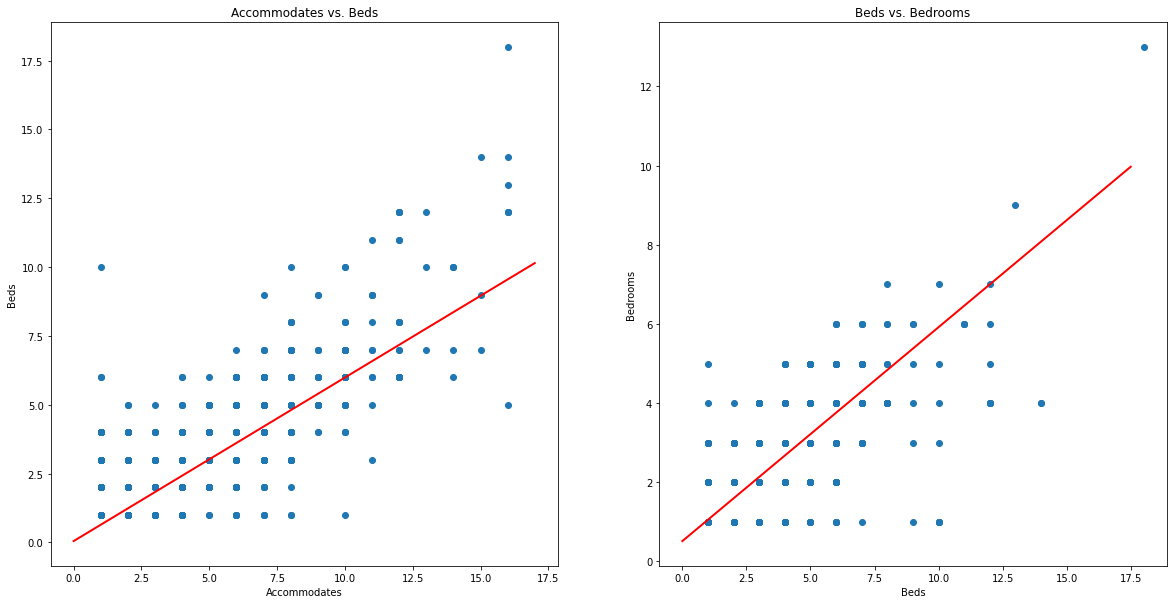

In [69]:
a = listings["accommodates"]
b = listings["beds"]
c = listings["bedrooms"]

# So let us estimate linear models and predict, for beds
Y = b
x = a
X = pd.DataFrame([x]).transpose()
X = sm.add_constant(X) # adding a constant
# Fit model for beds
model = sm.OLS(Y, X, missing='drop').fit()
x_seq1 = [0, 17]
x_seq = sm.add_constant(x_seq)
y_seq = model.predict(x_seq)

# So now estimate linear models and predict, for beds
Y2 = c
x2 = b
X2 = pd.DataFrame([x2]).transpose()
X2 = sm.add_constant(X2) # adding a constant
# Fit model for beds
model2 = sm.OLS(Y2, X2, missing='drop').fit()
x_seq2 = [0, 17.5]
x_seq3 = sm.add_constant(x_seq2)
y_seq2 = model2.predict(x_seq3)


fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(a,b)
ax[0].set_title("Accommodates vs. Beds")
ax[0].set_xlabel("Accommodates")
ax[0].set_ylabel("Beds")
ax[0].plot(x_seq1, y_seq, color='red',linewidth=2)
ax[1].scatter(b,c)
ax[1].set_title("Beds vs. Bedrooms")
ax[1].set_xlabel("Beds")
ax[1].set_ylabel("Bedrooms")
ax[1].plot(x_seq2, y_seq2, color='red',linewidth=2)

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beds   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.776e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:07:19   Log-Likelihood:                -7254.9
No. Observations:                6734   AIC:                         1.451e+04
Df Residuals:                    6732   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0478      0.016      3.008      0.003       0.017       0.079
accommodates     0.5941      0.004    133.248      0.000       0.585       0.603
==============================================================================
Omnibus:                     3468.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72230.109
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      18.539   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bedrooms   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.296e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:07:35   Log-Likelihood:                -5026.4
No. Observations:                6522   AIC:                         1.006e+04
Df Residuals:                    6520   BIC:                         1.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5155      0.011     47.377      0.000       0.494       0.537
beds           0.5404      0.005    113.851      0.000       0.531       0.550
==============================================================================
Omnibus:                     1555.709   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32659.808
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                      13.893   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

Text(0, 0.5, 'density')

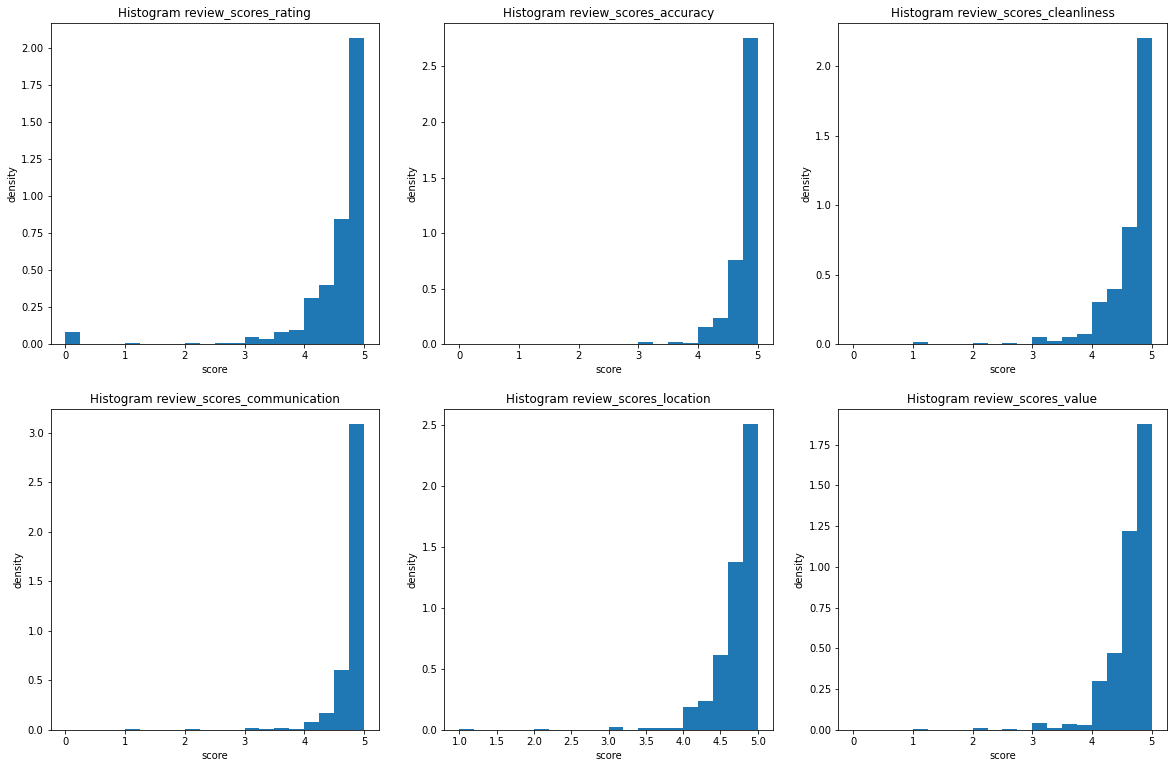

In [51]:
# Look all like half normal
review_var = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, ax = plt.subplots(2,3, figsize=(20, 13))
ax[0,0].hist(listings['review_scores_rating'], density=True, bins = 20)
ax[0,0].set_title('Histogram review_scores_rating')
ax[0,0].set_xlabel("score")
ax[0,0].set_ylabel("density")
ax[0,1].hist(listings['review_scores_accuracy'], density=True, bins = 20)
ax[0,1].set_title('Histogram review_scores_accuracy')
ax[0,1].set_xlabel("score")
ax[0,1].set_ylabel("density")
ax[0,2].hist(listings['review_scores_cleanliness'], density=True, bins = 20)
ax[0,2].set_title('Histogram review_scores_cleanliness')
ax[0,2].set_xlabel("score")
ax[0,2].set_ylabel("density")
ax[1,0].hist(listings['review_scores_communication'], density=True, bins = 20)
ax[1,0].set_title('Histogram review_scores_communication')
ax[1,0].set_xlabel("score")
ax[1,0].set_ylabel("density")
ax[1,1].hist(listings['review_scores_location'], density=True, bins = 20)
ax[1,1].set_title('Histogram review_scores_location')
ax[1,1].set_xlabel("score")
ax[1,1].set_ylabel("density")
ax[1,2].hist(listings['review_scores_value'], density=True, bins = 20)
ax[1,2].set_title('Histogram review_scores_value')
ax[1,2].set_xlabel("score")
ax[1,2].set_ylabel("density")


In [34]:
listings.isna().sum()[listings.isna().sum() > 0].sort_values()

name                               1
bathrooms_text                     6
host_has_profile_pic              11
host_total_listings_count         11
host_listings_count               11
host_picture_url                  11
host_thumbnail_url                11
host_is_superhost                 11
host_identity_verified            11
host_since                        11
host_name                         11
host_location                     32
description                      206
bedrooms                         236
beds                             242
review_scores_rating            1429
last_review                     1429
first_review                    1429
reviews_per_month               1429
review_scores_cleanliness       1573
review_scores_communication     1574
review_scores_accuracy          1574
review_scores_location          1580
review_scores_checkin           1580
review_scores_value             1582
host_neighbourhood              2173
neighborhood_overview           3028
n